In [1]:
import scanpy as sc
import torch
from deepmap import DeepMap
import warnings

In [2]:
torch.cuda.set_device(1)

In [3]:
warnings.filterwarnings('ignore')

In [4]:
adata = sc.read_h5ad('../datasets/Sperm_human_mouse.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 11785 × 14779
    obs: 'celltype', 'batch'

In [6]:
adata.obs

,celltype,batch
human.AAACCTGGTCCGAATT.1,late round spermatids,human
human.AAACGGGCACGGCGTT.1,mid round spermatids,human
human.AAACGGGGTAGCCTCG.1,late round spermatids,human
human.AAACGGGTCGGTTCGG.1,pachytene spermatocytes,human
human.AAAGATGAGCACGCCT.1,pachytene spermatocytes,human
...,...,...
mouse.TTTGGTTGTAGCGCAA.3,mid round spermatids,mouse
mouse.TTTGGTTGTGAGTGAC.3,mid round spermatids,mouse
mouse.TTTGGTTGTGTAAGTA.3,mid round spermatids,mouse
mouse.TTTGTCACACAGGCCT.3,early round spermatids,mouse


In [7]:
batch_key = 'batch'

model = DeepMap(k = 10, mnn_only = False)
model.preprocess(adata, batch_key, gene_num = 4000)
model.integrate(n_iters = 2000, beta = 0.1)

Fri Jun  2 16:43:39 2023 Data normalization ...
Fri Jun  2 16:43:41 2023 Finding highly variable genes ...
Fri Jun  2 16:43:44 2023 Found 1873 highly variable genes
Fri Jun  2 16:43:44 2023 Saving unscaled data ...
Fri Jun  2 16:43:44 2023 Data Scaling ...
Fri Jun  2 16:43:45 2023 Performing PCA ...
Fri Jun  2 16:43:45 2023 Start integrating ...
Fri Jun  2 16:43:45 2023 GPU used.
Fri Jun  2 16:43:46 2023 Finding neighbors ...
Fri Jun  2 16:43:46 2023 Initial neighbor search completed, time used: 0.6 second.
Fri Jun  2 16:44:19 2023 Reconstructing neighbors 1/5 ...
Fri Jun  2 16:44:26 2023 Reconstructing neighbors 2/5 ...
Fri Jun  2 16:44:33 2023 Reconstructing neighbors 3/5 ...
Fri Jun  2 16:44:40 2023 Reconstructing neighbors 4/5 ...
Fri Jun  2 16:44:46 2023 Reconstructing neighbors 5/5 ...
Fri Jun  2 16:44:53 2023 Integration finished.


In [8]:
model.integrated

View of AnnData object with n_obs × n_vars = 11785 × 20
    obs: 'celltype', 'batch'

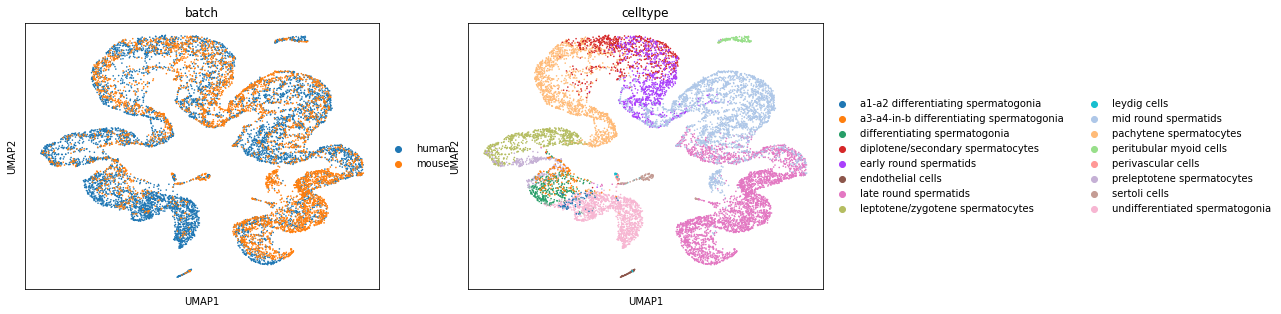

In [9]:
sc.pp.neighbors(model.integrated)
sc.tl.umap(model.integrated)
sc.pl.umap(model.integrated, color = ['batch', 'celltype'])